In [1]:
import quandl
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')


quandl.ApiConfig.api_key = "hGma1YxsN1KzgB4gjgsi"

def state_list():
    fiddy_states = pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states')
    return fiddy_states[0][0][1:]
    

def grab_initial_state_data():
    states = state_list()

    main_df = pd.DataFrame()

    for abbv in states:
        query = "FMAC/HPI_"+str(abbv)
        df = quandl.get(query, authtoken = quandl.ApiConfig.api_key )
        print(query)
        df[abbv] = (df[abbv]-df[abbv][0]) / df[abbv][0] * 100.0
        print(df.head())
        if main_df.empty:
            main_df = df
        else:
            main_df = main_df.join(df)
            
    pickle_out = open('fiddy_states.pickle','wb')
    pickle.dump(main_df, pickle_out)
    pickle_out.close()

def HPI_Benchmark():
    df = Quandl.get("FMAC/HPI_USA", authtoken=api_key)
    df["United States"] = (df["United States"]-df["United States"][0]) / df["United States"][0] * 100.0
    return df

HPI_data = pd.read_pickle('fiddy_states.pickle')

C:\Users\Farhana_Fayez\Anaconda2\envs\wolt\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
C:\Users\Farhana_Fayez\Anaconda2\envs\wolt\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


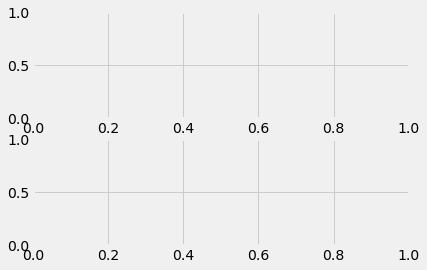

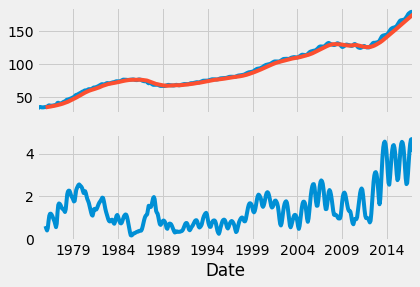

In [6]:
fig = plt.figure()
ax1 = plt.subplot2grid((2,1), (0,0))
ax2 = plt.subplot2grid((2,1), (1,0), sharex=ax1)
HPI_data = pd.read_pickle('fiddy_states.pickle')
HPI_data['TX12MA'] = pd.rolling_mean(HPI_data['TX'], 12)
HPI_data['TX12STD'] = pd.rolling_std(HPI_data['TX'], 12)

HPI_data['TX'].plot(ax=ax1)
HPI_data['TX12MA'].plot(ax=ax1)
HPI_data['TX12STD'].plot(ax=ax2)

plt.show()